# Instagram Scrapping

## Objectives

**Finding the right scrapping library for some data (Scrapping Method).**
1. Download Instagram Feeds
2. Fetching the metadata

**Explore Selected scrapping features**
1. Filter Post
2. Format scrapping used
3. Library functional limitation information


## Instaloader Command Line

In [ ]:
!pip3 install instaloader

     |████████████████████████████████| 59 kB 3.0 MB/s 
  Created wheel for instaloader: filename=instaloader-4.9-py3-none-any.whl size=61065 sha256=bb326989805fd3b77131939ce9591624b6e188267bdc6d850b4af53515ee9fa8
  Stored in directory: /root/.cache/pip/wheels/85/fb/29/7d540da52b65c8d4718cbb0e24a057d2c0071174716391bd85
Successfully built instaloader


In [ ]:
import instaloader

!instaloader --post-metadata-txt="{likes}, {comments}" --no-videos dibimbing.id --count 10

In [ ]:
import pandas as pd

## Read Metadata

In [ ]:
## Read file names

import glob
import os

os.chdir(r'/content/dibimbing.id')
namafiles = glob.glob('*.txt')
df = pd.DataFrame(namafiles, names="Date")
df = df.sort_values("Date")
df

,0
140,2021-12-04_09-57-55_UTC.txt
211,2021-12-04_12-03-41_UTC.txt
122,2021-12-05_12-45-44_UTC.txt
182,2021-12-06_08-17-57_UTC.txt
136,2021-12-06_11-44-21_UTC.txt
...,...
91,2022-04-10_08-08-37_UTC.txt
173,2022-04-11_05-34-38_UTC.txt
13,2022-04-11_12-16-34_UTC.txt
216,2022-04-12_05-00-24_UTC.txt


In [ ]:
### Re-coded for better DF
## Read name files

import glob
import os
import pandas as pd

os.chdir(r'/content/dibimbing.id')
namafiles = glob.glob('*.txt')
df = pd.DataFrame({
    "Date": namafiles
})
df = df.sort_values("Date", ascending=False)
df["Date"] = df["Date"].map(lambda x: x[:19].replace("-","").replace("_",""))
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d%H%M%S")

df.sort_values("Date")

,Date
31,2022-03-29 02:35:02
35,2022-03-29 11:17:14
26,2022-03-30 06:00:35
11,2022-03-30 08:05:53
20,2022-03-30 11:46:31
19,2022-03-31 03:09:18
13,2022-03-31 04:12:29
21,2022-03-31 11:39:12
15,2022-04-01 02:09:40
33,2022-04-01 11:25:53


In [ ]:
# Define relative path to folder containing the text files

files_folder = "/content/shopeefashion_id"
files = []

# Create a dataframe list by using a list comprehension

files = [pd.read_csv(file, delimiter=',', names =['likes', 'comments'] ) for file in glob.glob(os.path.join(files_folder ,"*.txt"))]

# Concatenate the list of DataFrames into one
files_df = pd.concat(files)

In [ ]:
files_df

,likes,comments
0,880,291
0,1245,317
0,890,177
0,18176,6587
0,2460,140
...,...,...
0,802,147
0,21427,7108
0,656,68
0,8685,2723


## JSON Instaloader

In [ ]:
df = pd.read_json("/content/shopeefashion_id/2022-01-13_05-00-47_UTC.json.xz")

In [ ]:
df

,node,instaloader
__typename,GraphImage,NaN
id,2750037578033316760,NaN
gating_info,None,NaN
fact_check_overall_rating,None,NaN
fact_check_information,None,NaN
media_overlay_info,None,NaN
sensitivity_friction_info,None,NaN
sharing_friction_info,"{'should_have_sharing_friction': False, 'bloks...",NaN
dimensions,"{'height': 1350, 'width': 1080}",NaN
display_url,https://scontent-mia3-1.cdninstagram.com/v/t51...,NaN


# Read Images

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python
!pip install --upgrade Pillow
!pip install instaloader

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,859 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

     |████████████████████████████████| 59 kB 2.8 MB/s 
  Created wheel for instaloader: filename=instaloader-4.9-py3-none-any.whl size=61065 sha256=9a484bd3a48757527e5b230585a2ebc3e93cf1ccb77f1b9cea0fae48c0efca88
  Stored in directory: /root/.cache/pip/wheels/85/fb/29/7d540da52b65c8d4718cbb0e24a057d2c0071174716391bd85
Successfully built instaloader


In [ ]:
import pytesseract
import cv2
import instaloader

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
import numpy as np

import os, glob
from IPython.display import Image

* The main idea here is to extract the text from images.
* First let's fetch some data from dibimbing.id 

In [ ]:
# fetch dibimbing.id 
from datetime import datetime
from itertools import dropwhile, takewhile

import instaloader

L = instaloader.Instaloader(download_videos=False, post_metadata_txt_pattern="{likes}, {comments}")

L.interactive_login("kang.noir")

posts = instaloader.Profile.from_username(L.context, "dibimbing.id").get_posts()

## Define limiter with date utils

SINCE = datetime(2022, 4, 14) # Postingan dari bulan 2022-04-14
UNTIL = datetime(2022, 3, 29) # Sampai 2022-03-29

for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post.date)
    L.download_post(post, "dibimbing.id")

Enter Instagram password for kang.noir: ··········
2022-04-13 13:26:38
dibimbing.id/2022-04-13_13-26-38_UTC_1.jpg dibimbing.id/2022-04-13_13-26-38_UTC_2.jpg dibimbing.id/2022-04-13_13-26-38_UTC_3.jpg dibimbing.id/2022-04-13_13-26-38_UTC_4.jpg dibimbing.id/2022-04-13_13-26-38_UTC_5.jpg dibimbing.id/2022-04-13_13-26-38_UTC_6.jpg [422, 11] json 
2022-04-13 12:11:47
dibimbing.id/2022-04-13_12-11-47_UTC.jpg [296, 3] json 
2022-04-13 08:15:34
dibimbing.id/2022-04-13_08-15-34_UTC.jpg [48, 0] json 
2022-04-12 12:58:43
dibimbing.id/2022-04-12_12-58-43_UTC.jpg [570, 15] json 
2022-04-12 05:00:24
dibimbing.id/2022-04-12_05-00-24_UTC.jpg [165, 3] json 
2022-04-11 12:16:34
dibimbing.id/2022-04-11_12-16-34_UTC_1.jpg dibimbing.id/2022-04-11_12-16-34_UTC_2.jpg dibimbing.id/2022-04-11_12-16-34_UTC_3.jpg dibimbing.id/2022-04-11_12-16-34_UTC_4.jpg dibimbing.id/2022-04-11_12-16-34_UTC_5.jpg dibimbing.id/2022-04-11_12-16-34_UTC_6.jpg dibimbing.id/2022-04-11_12-16-34_UTC_7.jpg dibimbing.id/2022-04-11_12-16-

In [ ]:
os.chdir("dibimbing.id")

In [ ]:
dibimbing_pic = glob.glob("*.jpg")

In [ ]:
dibimbing_pic = sorted(dibimbing_pic)

In [ ]:
dibimbing_pic[:7]

['2022-03-29_02-35-02_UTC.jpg',
 '2022-03-29_11-17-14_UTC_1.jpg',
 '2022-03-29_11-17-14_UTC_2.jpg',
 '2022-03-29_11-17-14_UTC_3.jpg',
 '2022-03-29_11-17-14_UTC_4.jpg',
 '2022-03-29_11-17-14_UTC_5.jpg',
 '2022-03-29_11-17-14_UTC_6.jpg']

* Let's show the first images

In [ ]:
dibimbing_pic[0]

'2022-03-29_02-35-02_UTC.jpg'

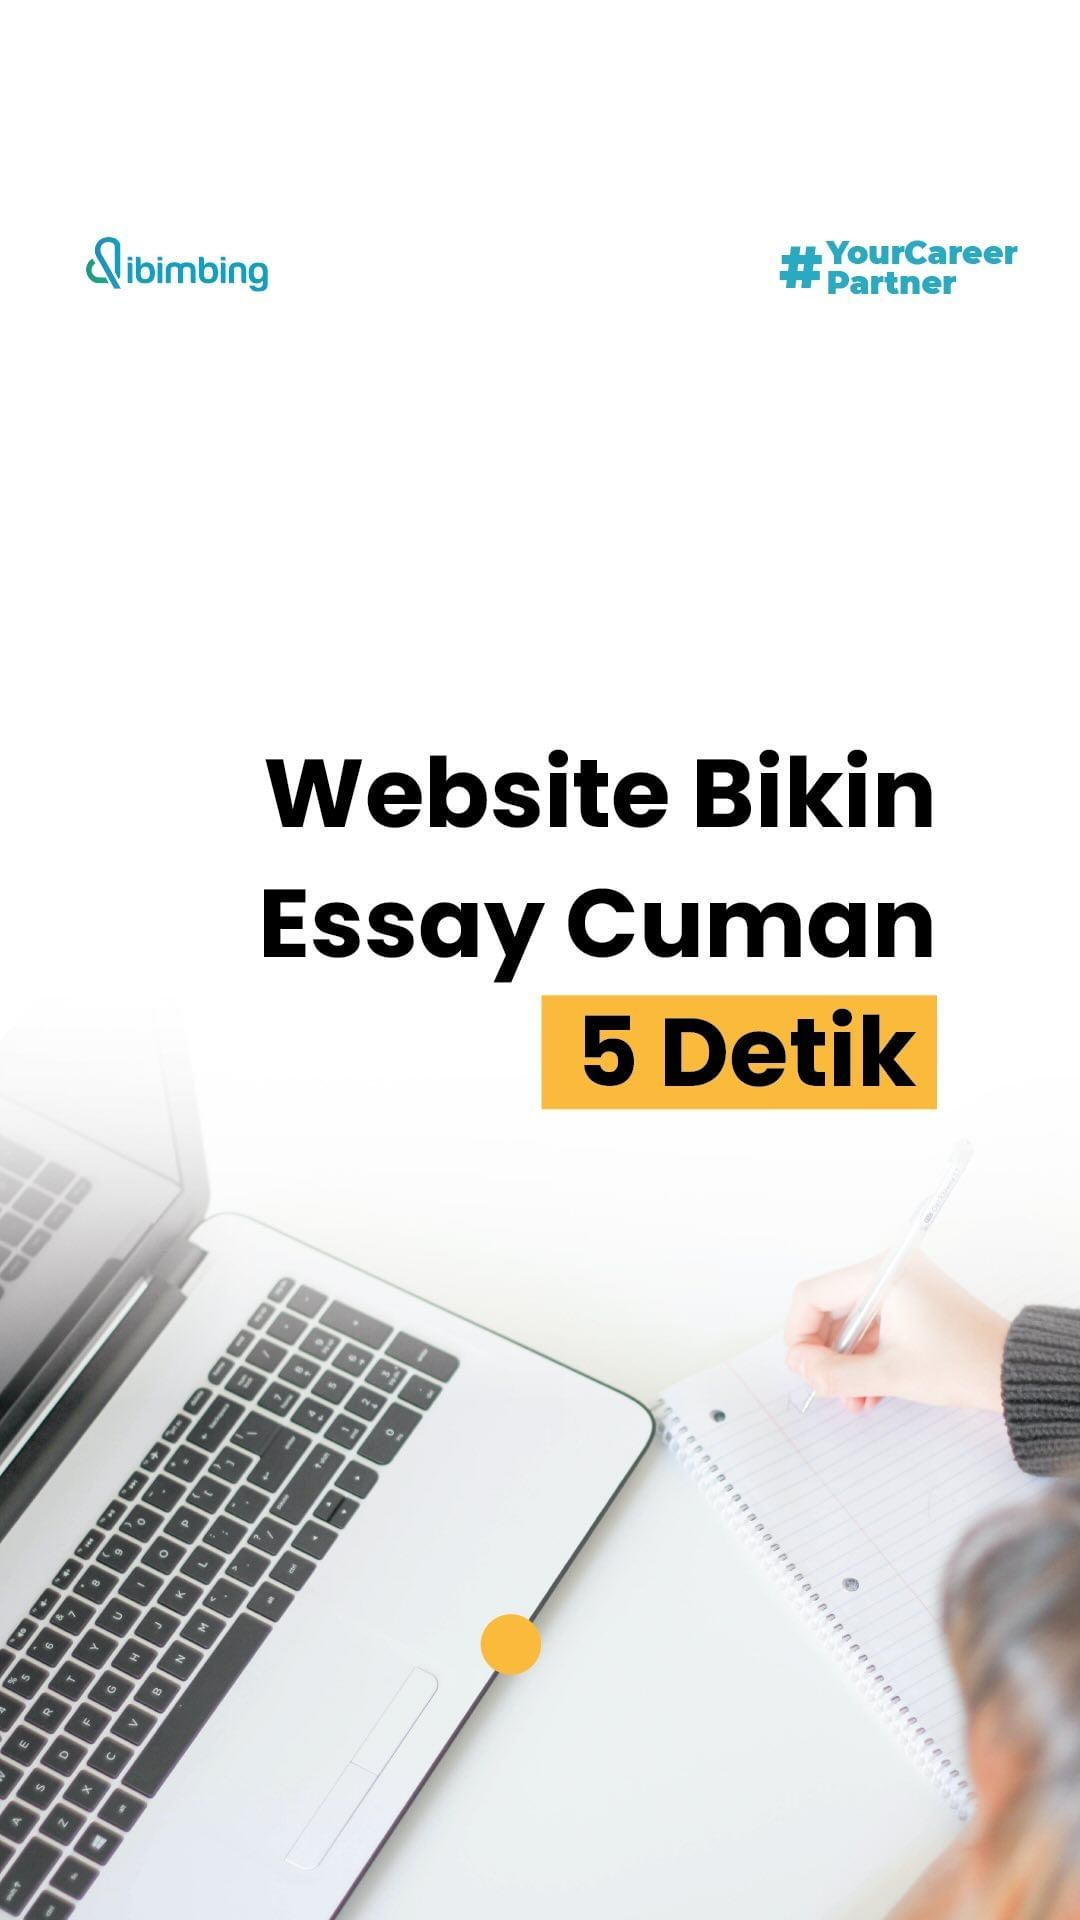

In [ ]:
Image(dibimbing_pic[0], width=500, height=500)

* Let's try it extracting with pytesseract
* By default `cv2.imread` returns an image with color format **BGR**
* On the other hand `pytesseract` only supports images with color format **RGB**
* So make sure to change the color format with the function `cv2.cvtCOLOR(img, COLOR)`

In [ ]:
img = cv2.imread(dibimbing_pic[0])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR2RGB
extracted_text = pytesseract.image_to_string(img_rgb)
extracted_text = " ".join(extracted_text.replace("\n", " ").split())
extracted_text

'A ibimbing eer Website Bikin Essay Cuman'

* It's work finely
* let's extract all text from dibimbing images

In [ ]:
# Extract all text
extracted_text = []

for pic in dibimbing_pic:
  img = cv2.imread(pic)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  text = pytesseract.image_to_string(img)
  text = " ".join(text.replace("\n", " ").split())

  extracted_text.append(text)

In [ ]:
dibimbing_pic[:8]

['2022-03-29_02-35-02_UTC.jpg',
 '2022-03-29_11-17-14_UTC_1.jpg',
 '2022-03-29_11-17-14_UTC_2.jpg',
 '2022-03-29_11-17-14_UTC_3.jpg',
 '2022-03-29_11-17-14_UTC_4.jpg',
 '2022-03-29_11-17-14_UTC_5.jpg',
 '2022-03-29_11-17-14_UTC_6.jpg',
 '2022-03-29_11-17-14_UTC_7.jpg']

* The next step is to define how many images per content
* as we can see above, the pattern is date_(i-th image)
* We will create a variable named `steps` which lists the number of images per content

In [ ]:
# making steps list
steps = []
txt = dibimbing_pic[0][:19]
j = 0

for pic in dibimbing_pic:
  if pic[:19] == txt:
    j = j + 1
  else:
    steps.append(j)
    txt = pic[:19]
    j = 1
if dibimbing_pic[-1][-5] == "C":
  steps.append(1)
else:  
  steps.append(int(dibimbing_pic[-1][-5]))

In [ ]:
print(steps)

[1, 7, 1, 1, 8, 1, 4, 7, 1, 8, 1, 1, 1, 1, 8, 1, 7, 6, 1, 6, 1, 2, 7, 1, 1, 1, 6, 1, 1, 8, 1, 8, 1, 1, 1, 1, 6]


In [ ]:
print(len(steps))

37


* Next steps we are gonna assign each text in their specific place
* we are going to use `numpy` help for that

In [ ]:
text_array = np.empty((37,9), dtype="object")
text_array.shape

(37, 9)

In [ ]:
d = 0
for i in range(text_array.shape[0]):
  for j in range(steps[i]):
    text_array[i, j] = extracted_text[d]
    d = d+ 1

cols_text = ["text{}".format(i) for i in range(1, 10)]

In [ ]:
cols_text = ["text{}".format(i) for i in range(1, 10)]
print(cols_text)

['text1', 'text2', 'text3', 'text4', 'text5', 'text6', 'text7', 'text8', 'text9']


In [ ]:
text_df = pd.DataFrame(text_array, columns=cols_text)

In [ ]:
text_df.iloc[1,:]

text1    Mibimbing $e YourCareer Kenapa Kita Harus Menc...
text2    ff YourCareer Partner Alivimbing Sering lihat ...
text3    ibimbi Y q ibimbing se career Lalu, kenapa Tan...
text4    we vourCereer Partner Alivimbing Nah, dalam me...
text5    sms Y q ibimbing + meee ae Ciri khas yang bisa...
text6    Al ibimbing gp cowrCarese Dari Tante Lala Kita...
text7    gp YourCareer ql ibimbing Partner Pengen belaj...
text8                                                 None
text9                                                 None
Name: 1, dtype: object

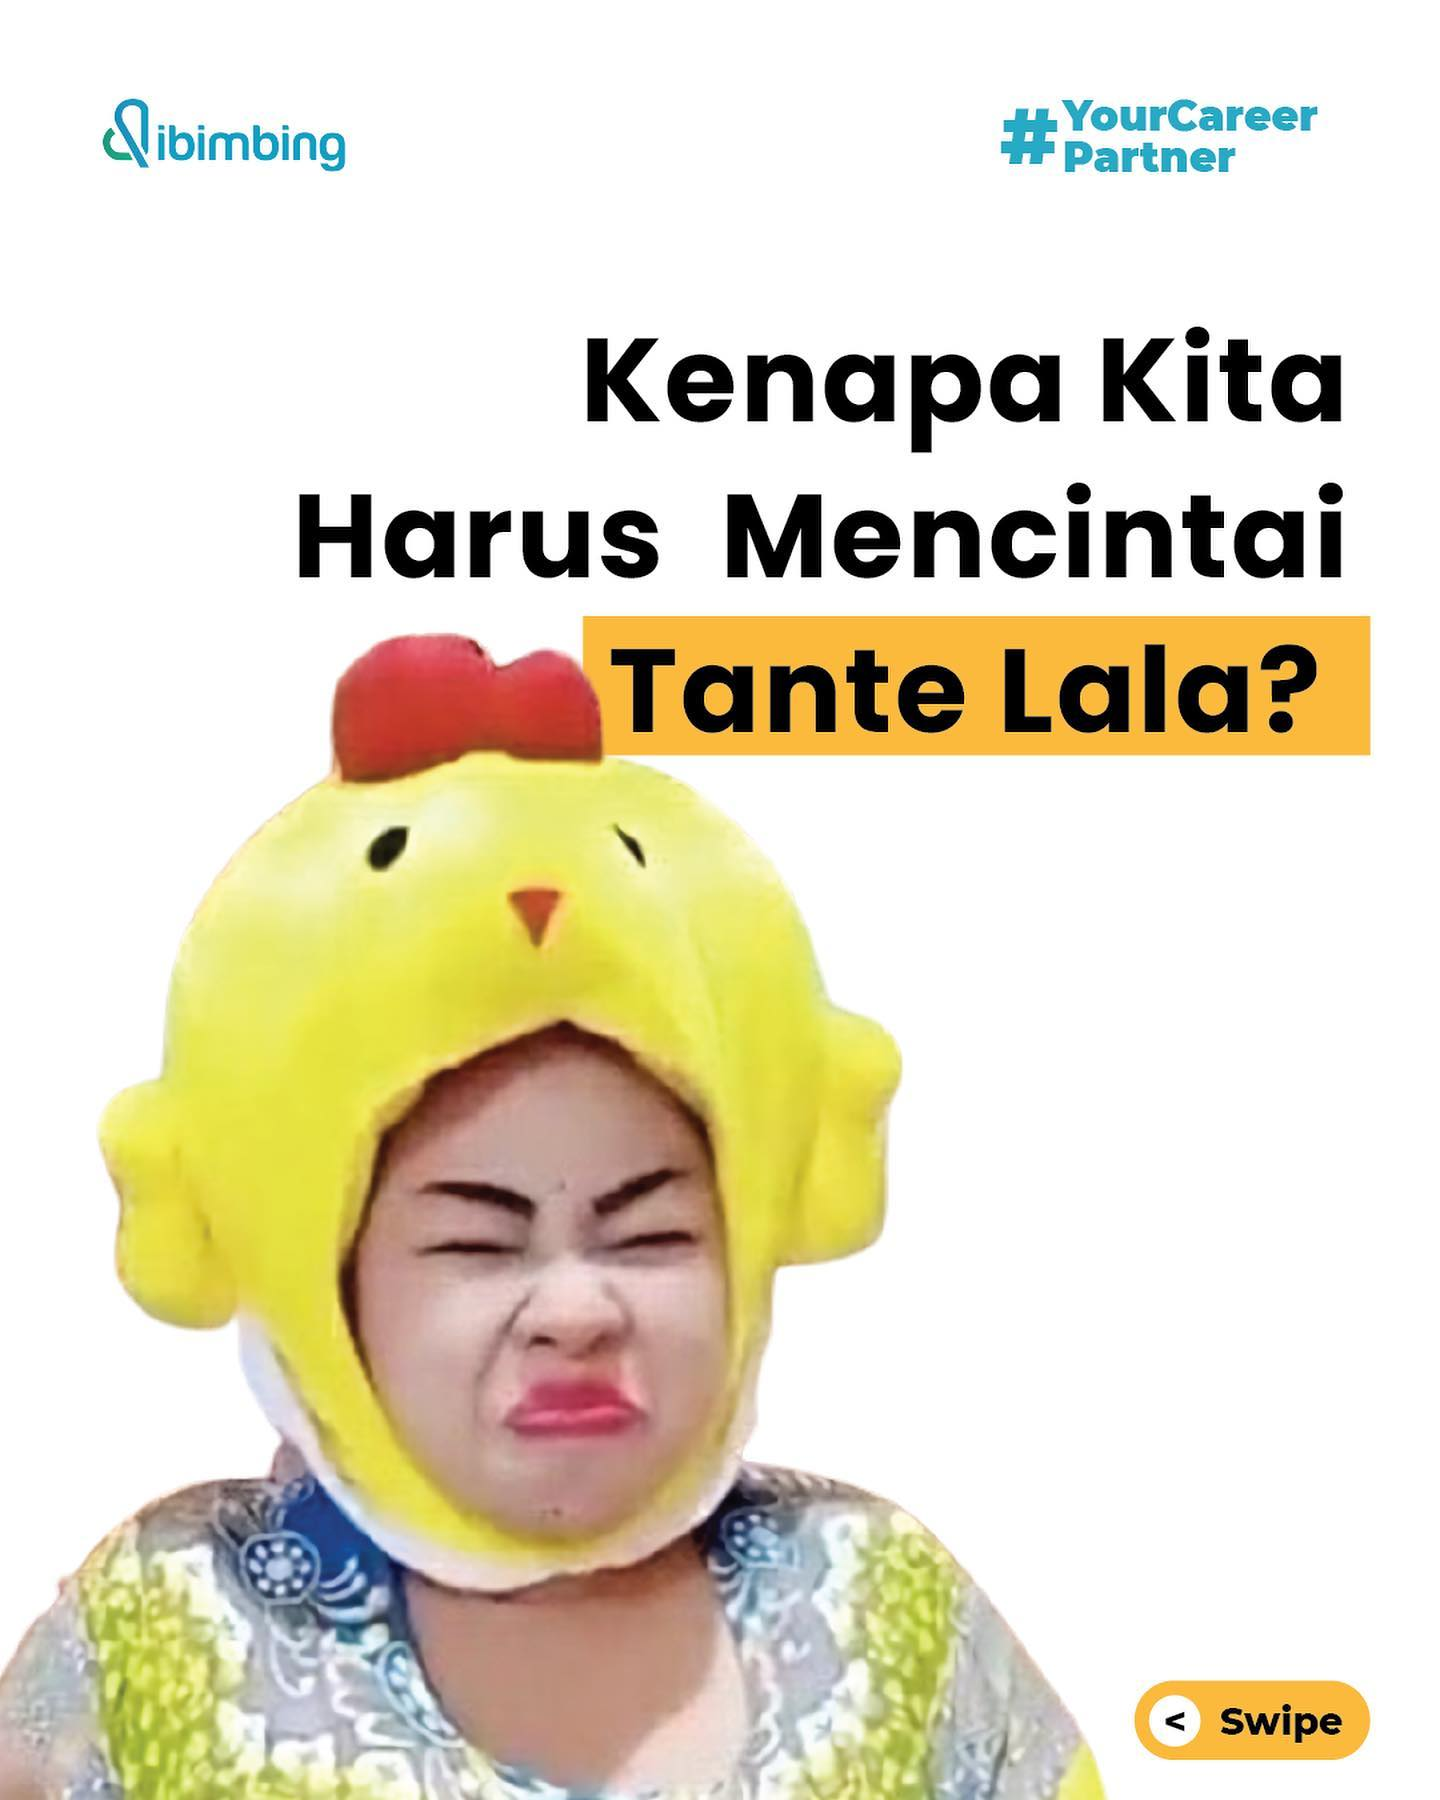

In [ ]:
Image(dibimbing_pic[1], width=300, height=300)

* Finally

# Combine

In [ ]:
from datetime import datetime
from itertools import dropwhile, takewhile

import instaloader

L = instaloader.Instaloader(download_videos=False, post_metadata_txt_pattern="{likes}, {comments}")

L.interactive_login("kang.noir")

posts = instaloader.Profile.from_username(L.context, "dibimbing.id").get_posts()

SINCE = datetime(2022, 4, 14)
UNTIL = datetime(2022, 3, 29)

for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post.date)
    L.download_post(post, "dibimbing.id")

Enter Instagram password for kang.noir: ··········
2022-04-13 13:26:38
dibimbing.id/2022-04-13_13-26-38_UTC_1.jpg dibimbing.id/2022-04-13_13-26-38_UTC_2.jpg dibimbing.id/2022-04-13_13-26-38_UTC_3.jpg dibimbing.id/2022-04-13_13-26-38_UTC_4.jpg dibimbing.id/2022-04-13_13-26-38_UTC_5.jpg dibimbing.id/2022-04-13_13-26-38_UTC_6.jpg [395, 11] json 
2022-04-13 12:11:47
dibimbing.id/2022-04-13_12-11-47_UTC.jpg [268, 2] json 
2022-04-13 08:15:34
dibimbing.id/2022-04-13_08-15-34_UTC.jpg [47, 0] json 
2022-04-12 12:58:43
dibimbing.id/2022-04-12_12-58-43_UTC.jpg [559, 15] json 
2022-04-12 05:00:24
dibimbing.id/2022-04-12_05-00-24_UTC.jpg [165, 3] json 
2022-04-11 12:16:34
dibimbing.id/2022-04-11_12-16-34_UTC_1.jpg dibimbing.id/2022-04-11_12-16-34_UTC_2.jpg dibimbing.id/2022-04-11_12-16-34_UTC_3.jpg dibimbing.id/2022-04-11_12-16-34_UTC_4.jpg dibimbing.id/2022-04-11_12-16-34_UTC_5.jpg dibimbing.id/2022-04-11_12-16-34_UTC_6.jpg dibimbing.id/2022-04-11_12-16-34_UTC_7.jpg dibimbing.id/2022-04-11_12-16-

In [ ]:
### Re-coded for better DF
## Read nama files

import glob
import os
import pandas as pd

os.chdir(r'/content/dibimbing.id')
namafiles = glob.glob('*.txt')
df = pd.DataFrame({
    "Date": namafiles
})
df = df.sort_values("Date")
df["Date"] = df["Date"].map(lambda x: x[:19].replace("-","").replace("_",""))
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d%H%M%S")

In [ ]:
df.head()

,Date
15,2022-03-29 02:35:02
1,2022-03-29 11:17:14
24,2022-03-30 06:00:35
11,2022-03-30 08:05:53
28,2022-03-30 11:46:31


In [ ]:
# Define relative path to folder containing the text files

files_folder = "/content/dibimbing.id"
files = []

# Create a dataframe list by using a list comprehension

files = [pd.read_csv(file, delimiter=',', names =['likes', 'comments'] ) for file in glob.glob(os.path.join(files_folder ,"*.txt"))]

# Concatenate the list of DataFrames into one
files_df = pd.concat(files)

In [ ]:
files_df = files_df.reset_index().drop("index",axis=1)
files_df.head()

,likes,comments
0,117,6
1,317,8
2,287,2
3,117,0
4,173,0


In [ ]:
dataframe = pd.concat([df, files_df], axis=1, join="inner")

In [ ]:
dataframe.head()

,Date,likes,comments
15,2022-03-29 02:35:02,5861,3
1,2022-03-29 11:17:14,317,8
24,2022-03-30 06:00:35,173,2
11,2022-03-30 08:05:53,57,0
28,2022-03-30 11:46:31,639,37


In [ ]:
dataframe = dataframe.sort_values("Date", ignore_index=True)

In [ ]:
dataframe.head()

,Date,likes,comments
0,2022-03-29 02:35:02,5861,3
1,2022-03-29 11:17:14,317,8
2,2022-03-30 06:00:35,173,2
3,2022-03-30 08:05:53,57,0
4,2022-03-30 11:46:31,639,37


In [ ]:
f = open("2022-03-29_02-35-02_UTC.txt", "r")
print(f.read())

5813, 3



* Same likes and comments
* Now let's finish it with combined the `dataframe` with `text_df`


In [ ]:
final_df = pd.concat([dataframe,text_df], axis=1, join="inner")
final_df.head()

,Date,likes,comments,text1,text2,text3,text4,text5,text6,text7,text8,text9
0,2022-03-29 02:35:02,5861,3,A ibimbing eer Website Bikin Essay Cuman,None,None,None,None,None,None,None,None
1,2022-03-29 11:17:14,317,8,Mibimbing $e YourCareer Kenapa Kita Harus Menc...,ff YourCareer Partner Alivimbing Sering lihat ...,"ibimbi Y q ibimbing se career Lalu, kenapa Tan...","we vourCereer Partner Alivimbing Nah, dalam me...",sms Y q ibimbing + meee ae Ciri khas yang bisa...,Al ibimbing gp cowrCarese Dari Tante Lala Kita...,gp YourCareer ql ibimbing Partner Pengen belaj...,None,None
2,2022-03-30 06:00:35,173,2,— . YourCareer q ibimbing Partner Me After Mem...,None,None,None,None,None,None,None,None
3,2022-03-30 08:05:53,57,0,gp Youcarear q ibimbing Partner SPECIALIZED BO...,None,None,None,None,None,None,None,None
4,2022-03-30 11:46:31,639,37,Al ibimbing ge YourCareer Bukan Teh Sosro Bran...,gp YourCareer A ibimbing Partner Tagline legen...,Cl a! AN rrteite eunber Sayangnya data berbica...,Mivimbing $e Yourcareer Minuman kemasan paling...,"Aoimbing spencer Dilansir dari marketeers.com,...",Mibimbing $e YourCareer “Tidak ada gunanya kon...,"AN orarante rr pct el atl Gimana, kamu termasu...",gp YourCareer ql ibimbing Partner Yuk pelajari...,None


* Combined Perfectly

In [ ]:
dibimbing_json = glob.glob("*.json.xz")
print(len(dibimbing_json))

37


In [ ]:
json_df1 = pd.read_json(dibimbing_json[0])

In [ ]:
json_df1

,node,instaloader
__typename,GraphVideo,NaN
id,2805788284214397273,NaN
gating_info,None,NaN
fact_check_overall_rating,None,NaN
fact_check_information,None,NaN
media_overlay_info,None,NaN
sensitivity_friction_info,None,NaN
sharing_friction_info,"{'should_have_sharing_friction': False, 'bloks...",NaN
dimensions,"{'height': 1920, 'width': 1080}",NaN
display_url,https://scontent-hkt1-2.cdninstagram.com/v/t51...,NaN


# Making custom function

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python
!pip install --upgrade Pillow
!pip install instaloader

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
  Using cached instaloader-4.9-py3-none-any.whl


In [ ]:
import pytesseract
import cv2
import instaloader
import pandas as pd
import numpy as np
import os, glob
from IPython.display import Image
from datetime import datetime
from itertools import dropwhile, takewhile

class InstaScrapper():
  def __init__(self, download_videos=False, post_metadata="{likes},{comments}"):
    self.L = instaloader.Instaloader(download_videos=download_videos, post_metadata_txt_pattern=post_metadata)
    self.CURRENT_DIR = os.getcwd()

  def login(self, username, password):
    self.L.login(username, password)

  def fetch_ig(self,target, since=None, until=None):
    self.target = target
    posts = instaloader.Profile.from_username(self.L.context, target).get_posts()

    if since != None and until != None:
      SINCE = datetime(since[0], since[1], since[2])
      UNTIL = datetime(until[0], until[1], until[2])

      for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
        print(post.date)
        self.L.download_post(post, target)
    else: # Fetch all instagram content
      for post in posts:
        print(post.date)
        self.L.download_post(post, target)
    self.target_dir = os.path.join(self.CURRENT_DIR, target)
    self.target_txt = glob.glob(f"{self.target_dir}/*UTC.txt")
    self.target_pic = glob.glob(f"{self.target_dir}/*.jpg")
  def get_likes_comments_df(self):
    namafiles = [i[len(self.target_dir)+1 :] for i in self.target_txt]
    dates_df = pd.DataFrame({
        "Date": namafiles
    })
    dates_df["Date"] = dates_df["Date"].map(lambda x: x[:19].replace("-","").replace("_",""))
    dates_df["Date"] = pd.to_datetime(dates_df["Date"], format="%Y%m%d%H%M%S")

    files = [pd.read_csv(file, delimiter=',', names =['likes', 'comments'] ) for file in self.target_txt]

    # Concatenate the list of DataFrames into one
    files_df = pd.concat(files) 
    files_df = files_df.reset_index().drop("index",axis=1)

    df = pd.concat([dates_df, files_df], axis=1, join="inner")
    return df.sort_values("Date", ignore_index=True)

  def get_images_text(self):
    text = []

    for pic in sorted(self.target_pic):
      img = cv2.imread(pic)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      extracted_text = pytesseract.image_to_string(img)
      extracted_text = " ".join(extracted_text.replace("\n", " ").split())

      text.append(extracted_text)
    return text

  def get_steps(self):
    steps = []
    target_pic = [i[len(self.target_dir)+1:] for i in sorted(self.target_pic)]
    txt = target_pic[0][:19]  
    j = 0

    for pic in target_pic:
      if pic[:19] == txt:
        j = j + 1
      else:
        steps.append(j)
        txt = pic[:19]
        j = 1
    if target_pic[-1][-5] == "C":
      steps.append(1)
    else:  
      steps.append(int(target_pic[-1][-5]))
    return steps

  def get_images_text_df(self):
    extracted_text = self.get_images_text()
    steps = self.get_steps()

    text_array = np.empty((len(steps),9), dtype="object")

    d = 0
    for i in range(text_array.shape[0]):
      for j in range(steps[i]):
        text_array[i, j] = extracted_text[d]
        d = d+ 1
    
    cols_text = ["text{}".format(i) for i in range(1, 10)]

    return pd.DataFrame(text_array, columns=cols_text)

  def get_all_df(self):
    text_df = self.get_images_text_df()
    df = self.get_likes_comments_df()

    return pd.concat([df,text_df], axis=1, join="inner")

  def scrape_all(self, target, since=None, until=None):
    self.fetch_ig(target, since, until)
    df = self.get_all_df()
    return df

In [ ]:
scrapper = InstaScrapper()

In [ ]:
scrapper.login("xxx","xxx")

In [ ]:
dicoding_df = scrapper.scrape_all("dicoding", (2022, 4, 27), (2022,4,20)) # 1 minggu terakhir 

2022-04-26 08:33:14
dicoding/2022-04-26_08-33-14_UTC.jpg exists [213,20] unchanged json 
2022-04-26 04:46:08
dicoding/2022-04-26_04-46-08_UTC.jpg exists [299,10] updated [299,13] json 
2022-04-25 08:30:44
dicoding/2022-04-25_08-30-44_UTC_1.jpg exists dicoding/2022-04-25_08-30-44_UTC_2.jpg exists dicoding/2022-04-25_08-30-44_UTC_3.jpg exists dicoding/2022-04-25_08-30-44_UTC_4.jpg exists dicoding/2022-04-25_08-30-44_UTC_5.jpg exists dicoding/2022-04-25_08-30-44_UTC_6.jpg exists dicoding/2022-04-25_08-30-44_UTC_7.jpg exists [2633,69] unchanged json 
2022-04-25 02:00:13
dicoding/2022-04-25_02-00-13_UTC_1.jpg exists dicoding/2022-04-25_02-00-13_UTC_2.jpg exists dicoding/2022-04-25_02-00-13_UTC_3.jpg exists dicoding/2022-04-25_02-00-13_UTC_4.jpg exists dicoding/2022-04-25_02-00-13_UTC_5.jpg exists [1925,78] unchanged json 
2022-04-24 08:40:56
dicoding/2022-04-24_08-40-56_UTC.jpg exists [531,0] unchanged json 
2022-04-24 04:36:13
dicoding/2022-04-24_04-36-13_UTC.jpg exists [1806,102] unchange

In [ ]:
dicoding_df

,Date,likes,comments,text1,text2,text3,text4,text5,text6,text7,text8,text9
0,2022-04-20 04:35:01,180,5,x lintasarta eB cloudeka Memahami Layanan Clou...,None,None,None,None,None,None,None,None
1,2022-04-20 08:49:07,996,142,dicoding Sebutkan 4 kata yang menggambarkan ke...,None,None,None,None,None,None,None,None
2,2022-04-21 02:00:32,816,9,dicoding Jangan pernah menyerah jika kamu masi...,dicoding Jangan biarkan penyesalan itu datang....,dicoding Gunakan kode promo: KARTINI22 BONUS 1...,None,None,None,None,None,None
3,2022-04-21 04:30:46,505,0,dicoding Setiap perempuan punya kesempatan yan...,dicoding Kartini di Dicoding: Tia Dwi Setiani ...,None,None,None,None,None,None,None
4,2022-04-22 10:01:56,2676,93,Peco a OF Kamu bisa pelajari materi Front-End ...,None,None,None,None,None,None,None,None
5,2022-04-23 04:30:12,528,9,dicoding Tio Reza Muchtar Peace Generation Ind...,None,None,None,None,None,None,None,None
6,2022-04-24 04:36:13,1806,102,"dicoding A, umbat oe my @umbattt tim reviewer ...",None,None,None,None,None,None,None,None
7,2022-04-24 08:40:56,531,0,Camp indosat® OOREDOO HUTCHISON Xx Teel Peluan...,None,None,None,None,None,None,None,None
8,2022-04-25 02:00:13,1925,78,dicoding untuk Pemula Telusuri teori dan prakt...,dicoding Tekuni ilmu jaringan komputer untuk m...,dicoding Ce loynate lia M Eline woN e1Cc1 tt P...,dicoding Metode Ajar @ Online - Self-paced Lea...,dicoding Kurikulum Industri Dicoding bekerja s...,None,None,None,None
9,2022-04-25 08:30:44,2633,69,C dicodine digitalent DAFTAR BEASISWA PELATIHA...,dicoding rc digitalent Apa sih Program Fresh G...,"eee a cy digitalent Kalau IT Support itu, apa ...","dicoding rc digitalent Lalu, benefit apa yang ...",Becca ¢ digitalent Syaratnya apa aja sih? Sima...,dicoding rc digitalent © Lolos Seleksi Adminis...,eee a ¢ digitalent Segera daftarkan dirimu dan...,None,None


In [ ]:
dibimbing_df = scrapper.scrape_all("dibimbing.id", (2022,4,27), (2022, 4, 20)) # 1 minggu terakhir

2022-04-26 13:19:48
dibimbing.id/2022-04-26_13-19-48_UTC_1.jpg dibimbing.id/2022-04-26_13-19-48_UTC_2.jpg dibimbing.id/2022-04-26_13-19-48_UTC_3.jpg dibimbing.id/2022-04-26_13-19-48_UTC_4.jpg dibimbing.id/2022-04-26_13-19-48_UTC_5.jpg dibimbing.id/2022-04-26_13-19-48_UTC_6.jpg dibimbing.id/2022-04-26_13-19-48_UTC_7.jpg dibimbing.id/2022-04-26_13-19-48_UTC_8.jpg dibimbing.id/2022-04-26_13-19-48_UTC_9.jpg [107,0] json 
2022-04-26 06:54:19
dibimbing.id/2022-04-26_06-54-19_UTC.jpg [268,13] json 
2022-04-25 14:20:58
dibimbing.id/2022-04-25_14-20-58_UTC.jpg [204,12] json 
2022-04-25 12:02:42
dibimbing.id/2022-04-25_12-02-42_UTC_1.jpg dibimbing.id/2022-04-25_12-02-42_UTC_2.jpg dibimbing.id/2022-04-25_12-02-42_UTC_3.jpg dibimbing.id/2022-04-25_12-02-42_UTC_4.jpg dibimbing.id/2022-04-25_12-02-42_UTC_5.jpg dibimbing.id/2022-04-25_12-02-42_UTC_6.jpg dibimbing.id/2022-04-25_12-02-42_UTC_7.jpg dibimbing.id/2022-04-25_12-02-42_UTC_8.jpg dibimbing.id/2022-04-25_12-02-42_UTC_9.jpg [484,37] json 
2022-

In [ ]:
print(dibimbing_df.shape)
dibimbing_df.head()

(15, 12)


,Date,likes,comments,text1,text2,text3,text4,text5,text6,text7,text8,text9
0,2022-04-20 01:26:17,106,0,ee Yourc q ibimbing # Heard ue Masih Pusing Be...,None,None,None,None,None,None,None,None
1,2022-04-20 06:41:47,65,0,Qivimbing $f YourCareer Mini Bootcamp Front-En...,None,None,None,None,None,None,None,None
2,2022-04-20 13:15:54,518,359,"ate se penrcer*e"" Mau Belajar Graphic Design &...",. eer et ee Al lOIMDING #NgabuburitSeriesDibim...,Al ibimbing ge rourcereer Dari FREE COURSE ini...,wp Sourceareer Alibimbing Partner Hanya untuk ...,None,None,None,None,None
3,2022-04-21 00:49:03,102,1,— . YourCareer q ibimbing Partner 5 Rekomendsi...,None,None,None,None,None,None,None,None
4,2022-04-21 11:52:37,83,0,gp VourCareer rt Aibimbing YourCan PROMO THR p...,None,None,None,None,None,None,None,None


In [ ]:
rumahsandyakala_df = scrapper.scrape_all("rumahsandyakala", (2022,4,27), (2022,4,20)) # 1 minggu terakhir

2022-04-23 12:00:27
rumahsandyakala/2022-04-23_12-00-27_UTC_1.jpg rumahsandyakala/2022-04-23_12-00-27_UTC_2.jpg rumahsandyakala/2022-04-23_12-00-27_UTC_3.jpg rumahsandyakala/2022-04-23_12-00-27_UTC_4.jpg rumahsandyakala/2022-04-23_12-00-27_UTC_5.jpg rumahsandyakala/2022-04-23_12-00-27_UTC_6.jpg rumahsandyakala/2022-04-23_12-00-27_UTC_7.jpg [2266,13] json 
2022-04-21 10:59:38
rumahsandyakala/2022-04-21_10-59-38_UTC_1.jpg rumahsandyakala/2022-04-21_10-59-38_UTC_2.jpg rumahsandyakala/2022-04-21_10-59-38_UTC_3.jpg rumahsandyakala/2022-04-21_10-59-38_UTC_4.jpg rumahsandyakala/2022-04-21_10-59-38_UTC_5.jpg rumahsandyakala/2022-04-21_10-59-38_UTC_6.jpg [4423,49] json 


In [ ]:
print(rumahsandyakala_df.shape)
rumahsandyakala_df

(2, 12)


,Date,likes,comments,text1,text2,text3,text4,text5,text6,text7,text8,text9
0,2022-04-21 10:59:38,4423,49,Sepatah Rasa 21 April 2022 Dewasa bukan cuma t...,Sepatah Rasa 21 April 2022 Bukan cuman tentang...,Sepatah Rasa 21 April 2022 Bukan cuman tentang...,Sepatah Rasa 21 April 2022 Bukan juga cuman te...,Sepatah Rasa 21 April 2022 f § Dewasa bukan cu...,Sepatah Rasa 21 April 2022 Kalau menurutmu sen...,None,None,None
1,2022-04-23 12:00:27,2266,13,Sepenggal Harapan 23 April 2022 “Gak semuanya ...,Sepenggal Harapan 23 April 2022 Memang gak mud...,Sepenggal Harapan 23 April 2022 Memang gak mud...,Sepenggal Harapan 23 April 2022 Memang gak mud...,"Sepenggal Harapan 23 April 2022 Jadi gapapa, K...",Sepenggal Harapan 23 April 2022 Dan juga gapap...,Sepenggal Harapan 23 April 2022 Kamu suka deng...,None,None
